In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

In [13]:
def Landweber(A, b, iter_=30, alp_=None):
    """
    Implementacja metody iteracyjnej Landwebera
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    alp_  : relaxation parameter alp_>0 
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    # Set relaxation parameter if not given: alp=1/|max(eigA.T A)| 
    if alp_ == None:
        alp_ = 1 / np.abs(np.max(np.linalg.eig(A.T@A)[0]))  
    
    x = np.zeros( (iter_, A.shape[1], 1) )   
    invS = np.linalg.inv( (1/alp_)*np.eye(A.shape[1]) )
    T = (1/alp_)*np.eye(A.shape[1])-A.T@A
    
    for i in range(iter_):
        G = invS@T
        c = invS@b
        x[i] = G@x[i-1]+c
    return x

In [14]:
def GaussSeidel(A, b, iter_=30):
    """
    Implementacja metody iteracyjnej Gaussa-Sidela
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    x = np.zeros( (iter_, A.shape[1], 1) )
    invS = np.linalg.inv(np.tril(A, 0))
    T = -np.triu(A, 1)
    
    for i in range(iter_):
        G = invS@T
        c = invS@b
        x[i] = G@x[i-1]+c
    return x

In [15]:
def Jacobi(A, b, iter_=30):
    """
    Implementacja metody iteracyjnej Jacobiego
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    x = np.zeros( (iter_, A.shape[1], 1) )
    invS = np.reciprocal(np.diag(A))[np.newaxis]
    T = -A+np.diag(np.diag(A))    
    
    for i in range(iter_):
        G = invS*T
        c = invS.T*b
        x[i] = G@x[i-1]+c
    return x

In [16]:
def SuccessiveOverRelaxation(A, b, omeg_=1, iter_=30):
    """
    Implementacja metody iteracyjnej Successive Over-Relaxation (SOR)
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    omeg_ : relaxation parametr omeg_ in (0,2)
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """ 
    x = np.zeros( (iter_, A.shape[1], 1) )
    invS = np.linalg.inv( np.tril(A,-1) + (1/omeg_)*np.diag(np.diag(A)) )
    T = -(np.triu(A,1)+ ((omeg_-1)/omeg_)*np.diag(np.diag(A)))
    
    for i in range(iter_):
        G = invS@T
        c = invS@b
        x[i] = G@x[i-1]+c
    return x

In [17]:
def SteepestDescen(A, b, iter_=30):
    """
    Implementacja metody iteracyjnej SteepestDescen (SD)
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    x = np.zeros( (iter_, A.shape[1], 1) )
    
    for i in range(iter_):
        r = b-A@x[i-1]
        g = -A.T@r
        w = A@g
        alp_ = (g.T@g)/(w.T@w)
        x[i] = x[i-1]-alp_*g
    return x

In [18]:
def Kaczmarz(A, b, alp_=1, iter_ = 30):
    """
    Implementacja metody iteracyjnej Kaczmarza
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    alp_ : relaxation parametr alp_ (0,2)
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    
    x = np.zeros( (iter_, A.shape[1], 1) )
    l = np.power(np.linalg.norm(A, axis=1), 2)
    
    for j in range(iter_):
        x[j] = x[j-1]
        for i in range(A.shape[0]):
            x[j] += alp_*((b[i]-A[i,:]@x[j])/l[i])*A[[i],:].T
    return x

In [19]:
def designateParameters(X,A,b,x_solve):
    """
    """
    error = {}
    error['Solve'] = np.linalg.norm(X-x_solve, axis=1)
    error['Residual'] = np.linalg.norm(b-A@X, axis=1)
    temp = np.append(np.zeros(x_solve.shape), X)
    temp = temp[:temp.size-x_solve.size].reshape(X.shape[0], X.shape[1], X.shape[2])
    error['Convergence'] = np.linalg.norm(temp-X, axis=1)
    return error

In [9]:
def testAllMethods(A,b,x_solve, iter_=30):
    methods = {}
    
    methods['Landweber'] = {}
    methods['Landweber']['Value'] = Landweber(A,b,iter_=iter_)
    methods['Landweber']['Error'] = designateParameters(methods['Landweber']['Value'],A,b,x_solve)
    
    methods['GaussSeidel'] = {}
    methods['GaussSeidel']['Value'] = GaussSeidel(A,b,iter_=iter_)
    methods['GaussSeidel']['Error'] = designateParameters(methods['GaussSeidel']['Value'],A,b,x_solve)
    
    methods['Jacobi'] = {}
    methods['Jacobi']['Value'] = Jacobi(A,b,iter_=iter_)
    methods['Jacobi']['Error'] = designateParameters(methods['Jacobi']['Value'],A,b,x_solve)
    
    methods['SuccessiveOverRelaxation'] = {}
    methods['SuccessiveOverRelaxation']['Value'] = SuccessiveOverRelaxation(A,b,iter_=iter_)
    methods['SuccessiveOverRelaxation']['Error'] = designateParameters(methods['SuccessiveOverRelaxation']['Value'],A,b,x_solve)
    
    methods['SteepestDescen'] = {}
    methods['SteepestDescen']['Value'] = SteepestDescen(A,b,iter_=iter_)
    methods['SteepestDescen']['Error'] = designateParameters(methods['SteepestDescen']['Value'],A,b,x_solve)
    
    methods['Kaczmarz'] = {}
    methods['Kaczmarz']['Value'] = SteepestDescen(A,b,iter_=iter_)
    methods['Kaczmarz']['Error'] = designateParameters(methods['Kaczmarz']['Value'],A,b,x_solve)
    
    return methods

In [43]:
def drawPlots(methods):
    for m in methods:
        fig, axs = plt.subplots(1, 3)
        axs[0].plot(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Solve'])
        axs[0].set_title(f"{m} - Błąd rozwiązania")
        axs[0].set_xlabel("N - Ilość iteracji")
        axs[0].grid()
        axs[1].plot(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Residual'])
        axs[1].set_title(f"{m} - Błąd residualny")
        axs[1].set_xlabel("N - Ilość iteracji")
        axs[1].grid()
        axs[2].plot(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Convergence'])
        axs[2].set_title(f"{m} - Kowergencja")
        axs[2].set_xlabel("N - Ilość iteracji")
        axs[2].grid()
        fig.tight_layout(pad=4.0)
        plt.show()

---
## Zadanie 1


Rozwiązanie dokładne:
[[1.]
 [2.]
 [3.]
 [4.]]

Wyniki uzyskane metodą Landweber, w 30 iteracjach:
[[0.62467947]
 [1.53026565]
 [2.51994322]
 [2.60797743]]
Wyniki uzyskane metodą GaussSeidel, w 30 iteracjach:
[[0.99998866]
 [1.99998516]
 [2.99998799]
 [3.999994  ]]
Wyniki uzyskane metodą Jacobi, w 30 iteracjach:
[[0.99719639]
 [1.99439279]
 [2.99546367]
 [3.99653455]]
Wyniki uzyskane metodą SuccessiveOverRelaxation, w 30 iteracjach:
[[0.99998866]
 [1.99998516]
 [2.99998799]
 [3.999994  ]]
Wyniki uzyskane metodą SteepestDescen, w 30 iteracjach:
[[0.06596297]
 [0.45731098]
 [1.48855101]
 [3.04647593]]
Wyniki uzyskane metodą Kaczmarz, w 30 iteracjach:
[[0.06596297]
 [0.45731098]
 [1.48855101]
 [3.04647593]]

 Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen


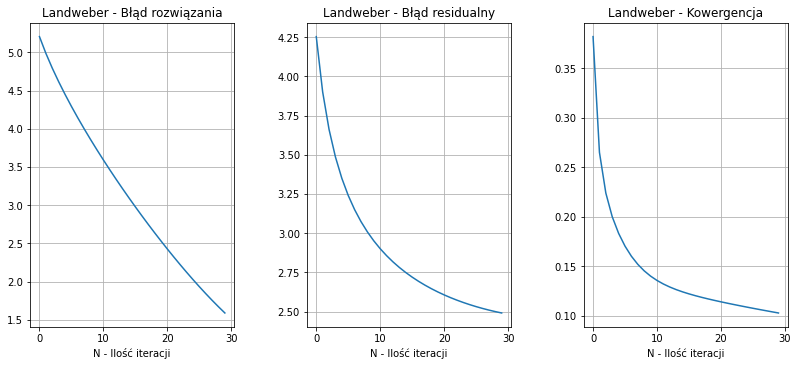

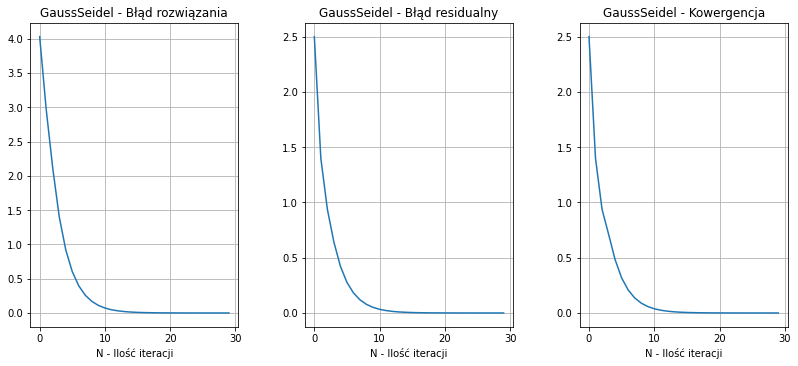

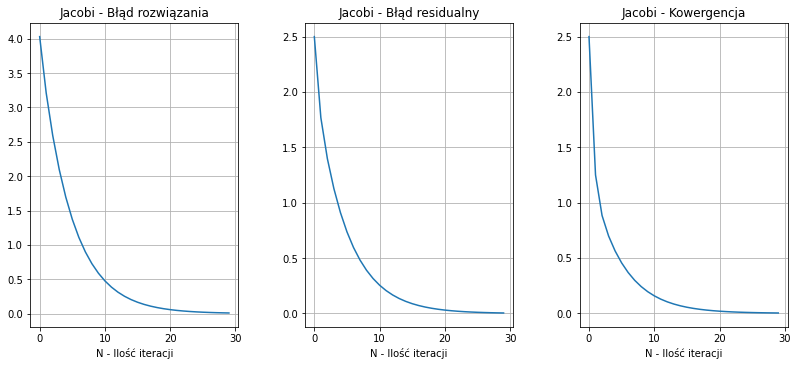

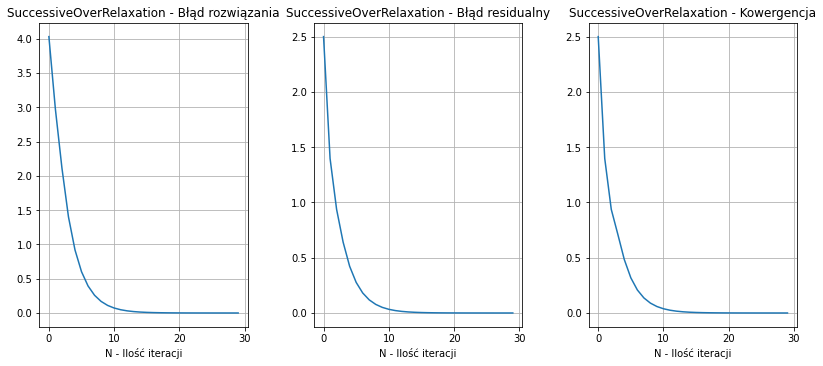

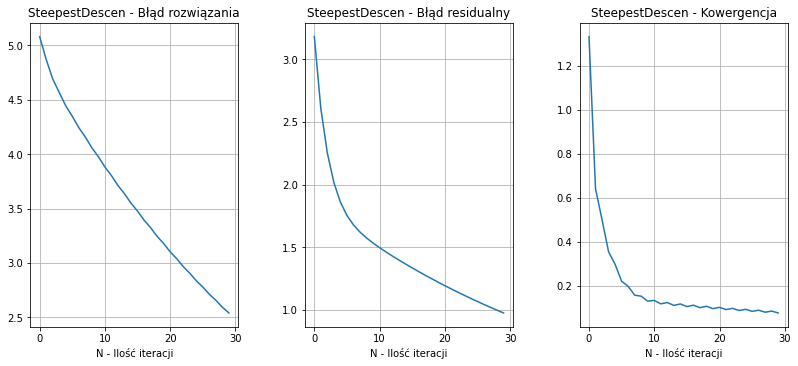

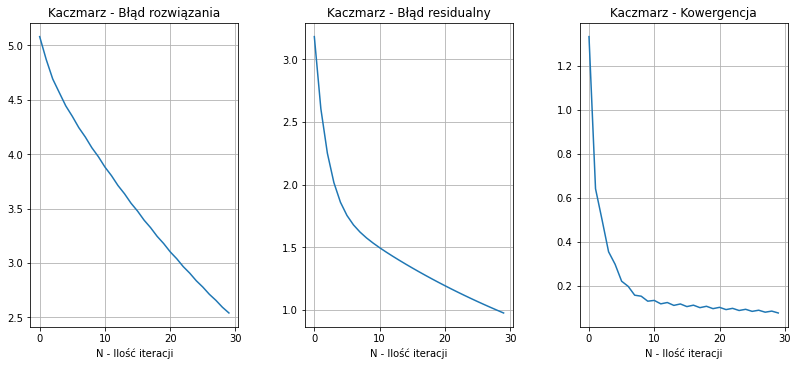

In [44]:
A = np.array([[2,-1,0,0],
              [-1,2,-1,0],
              [0,-1,2,-1],
              [0,0,-1,2]],dtype=np.double)
b = np.array([0,0,0,5],
             dtype=np.double).reshape(4,1)
x_solve = np.linalg.inv(A)@b

iterative_methods = testAllMethods(A,b,x_solve,30)

print("Rozwiązanie dokładne:")
print(x_solve)
print()

for m in iterative_methods:
    iter_ = iterative_methods[m]['Value'].shape[0]
    print(f"Wyniki uzyskane metodą {m}, w {iter_} iteracjach:")
    print(iterative_methods[m]['Value'][iter_-1])
    
print("\n Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen")

drawPlots(iterative_methods)